In [41]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk

# Load the dataset
file_path = 'sentiment100.csv'
df = pd.read_csv(file_path)
nltk.download('stopwords')

# Initialize the stopwords
stop_words = set(stopwords.words('english'))

# Ensure that 'Text' column is of type string, and replace NaN with an empty string
df['Text'] = df['Text'].fillna('').astype(str)

# Apply stemming (if needed) and remove stopwords in the 'Text' column
df['Text'] = df['Text'].apply(lambda x: ' '.join(
    [word for word in re.sub(r'[^\w\s]', '', x).split() if word.lower() not in stop_words]
))

# Preprocess the 'Text' column
df['Text'] = df['Text'].str.lower() \
                       .apply(lambda x: re.sub(r'[^a-z\s]', '', x)) \
                       .apply(lambda x: re.sub(r'[^\x00-\x7F]', '', x))\
                       .apply(lambda x: re.sub(r'\s+', ' ', x).strip())

# Display the first few rows of the processed data
print(df[['Text', 'Sentiment']])
# Save the preprocessed DataFrame to a new CSV file named 'data_bersih.csv'
df.to_csv('data_bersih.csv', index=False)


                                              Text       Sentiment
0                      enjoying beautiful day park      Positive  
1                         traffic terrible morning      Negative  
2                         finished amazing workout      Positive  
3                 excited upcoming weekend getaway      Positive  
4                 trying new recipe dinner tonight      Neutral   
..                                             ...             ...
95   confusion reigns try make sense recent events   Confusion    
96     excitement building surprise birthday party   Excitement   
97                 witnessed act kindness made day   Kind         
98  pride completing challenging fitness challenge   Pride        
99                 moment shame speaking injustice   Shame        

[100 rows x 2 columns]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = df[['Text', 'Sentiment']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       100 non-null    object
 1   Sentiment  99 non-null     object
dtypes: object(2)
memory usage: 1.7+ KB


In [5]:
df.Sentiment.value_counts()

Sentiment
 Positive         43
 Neutral           4
 Negative          4
 Disappointed      2
 Pride             2
 Kind              2
 Excitement        2
 Confusion         2
 Calmness          2
 Bitter            2
 Anticipation      2
 Adoration         2
 Acceptance        2
 Surprise          2
 Affection         2
 Awe               2
 Admiration        2
 Enjoyment         2
 Amusement         2
 Love              2
 Joy               2
 Happiness         2
 Disgust           2
 Sadness           2
 Fear              2
 Anger             2
 Shame             2
Name: count, dtype: int64

In [6]:
count_wd = []
for word in df['Text']:
    count = len(word.split())
    count_wd.append(count)
df['count_words'] = count_wd
df

,Text,Sentiment,count_words
0,enjoying beautiful day park,Positive,4
1,traffic terrible morning,Negative,3
2,finished amazing workout,Positive,3
3,excited upcoming weekend getaway,Positive,4
4,trying new recipe dinner tonight,Neutral,5
...,...,...,...
95,confusion reigns try make sense recent events,Confusion,7
96,excitement building surprise birthday party,Excitement,5
97,witnessed act kindness made day,Kind,5
98,pride completing challenging fitness challenge,Pride,5


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

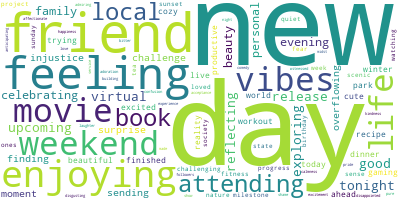

In [8]:
# Join the different processed titles together.
long_string = ','.join(list(df['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = df['Text'].to_list()
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

data_FE = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
data_FE

,acceptance,accomplished,achievement,achieving,act,admiring,adopted,adorable,adoration,adventure,...,weekend,weeks,welcoming,winter,witnessed,work,workout,workshop,world,worlds
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.560103,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.451955,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.501316,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.460018,0.0,0.000000,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [10]:
data_FE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 300 entries, acceptance to worlds
dtypes: float64(300)
memory usage: 234.5 KB


In [11]:
from sklearn.cluster import KMeans
k = range(1,20)
inertia = []

for i in k:
    km_model = KMeans(n_clusters=i) # jumlah cluster akan di looping
    km_model.fit(data_FE)
    inertia.append(km_model.inertia_)

print(list(k))
print(inertia)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[97.03345943526283, 95.12639444127149, 93.47292887927043, 92.27350359847011, 90.74714132669405, 91.46969473861974, 86.89391914381616, 85.62484440033748, 84.1857514486808, 82.636962848102, 81.14201029000898, 80.12039483962887, 78.1695012475098, 76.90749898499618, 79.57199528348869, 79.09610429954742, 72.73278000438063, 77.78525229788421, 76.14487163711684]


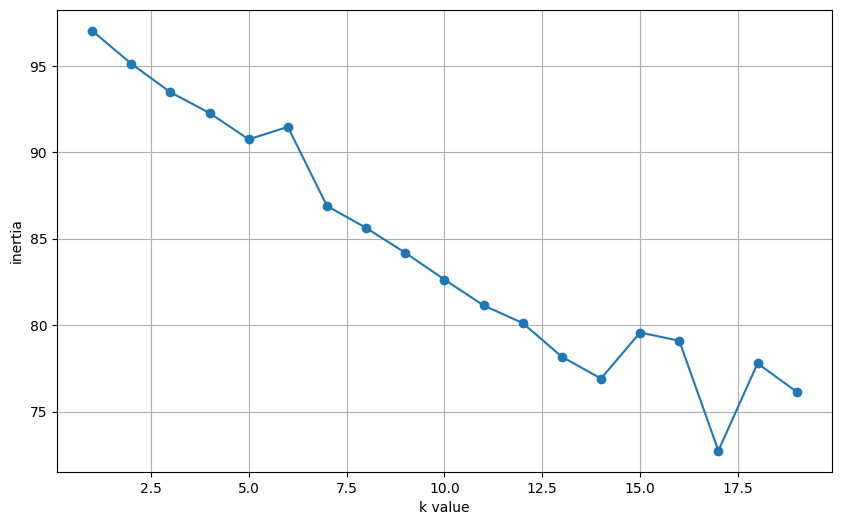

In [13]:
plt.figure(figsize=(10,6))
plt.plot(k, inertia, marker='o')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.grid()
plt.show()

In [14]:
kn7 = KMeans(n_clusters=7, random_state=1).fit(data_FE)
kn7

KMeans(n_clusters=7, random_state=1)

In [15]:
kn7.labels_

array([1, 2, 2, 5, 0, 3, 3, 4, 2, 3, 4, 3, 3, 2, 3, 2, 2, 0, 2, 3, 6, 2,
       3, 2, 0, 0, 4, 6, 2, 4, 5, 6, 4, 3, 1, 5, 0, 2, 4, 5, 2, 0, 3, 6,
       5, 4, 2, 2, 2, 2, 4, 2, 2, 3, 2, 3, 0, 2, 3, 1, 6, 2, 3, 3, 2, 1,
       3, 2, 2, 2, 1, 2, 5, 2, 3, 2, 2, 3, 2, 3, 4, 2, 1, 3, 1, 3, 0, 2,
       2, 2, 3, 2, 4, 2, 3, 2, 0, 1, 3, 2])

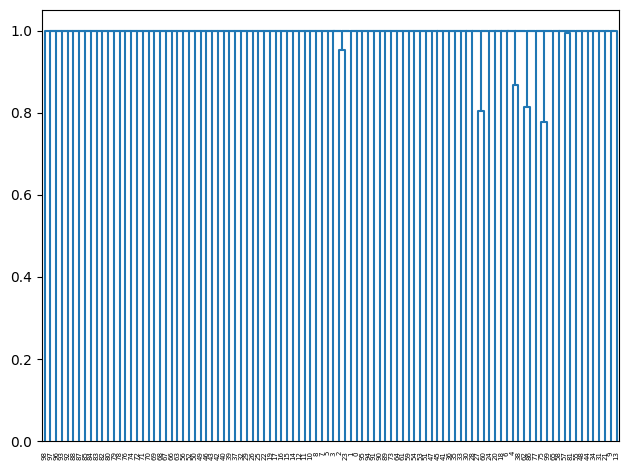

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linkage_data = linkage(data_FE, method = 'single', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

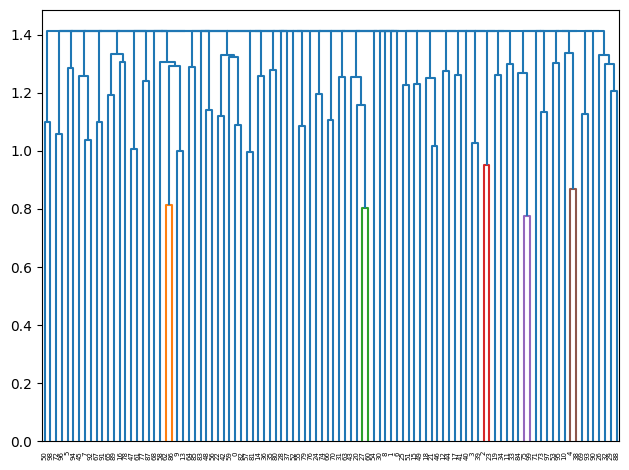

In [17]:
linkage_data = linkage(data_FE, method = 'complete', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

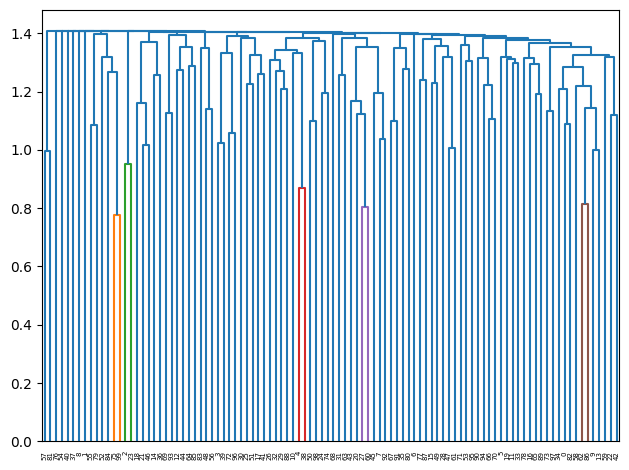

In [18]:
linkage_data = linkage(data_FE, method = 'average', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

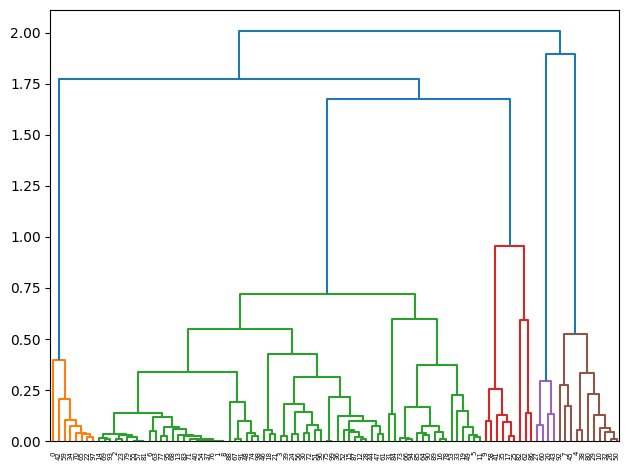

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
data_FE_pca = pca.fit_transform(data_FE)

linkage_data_pca = linkage(data_FE_pca, method='ward', metric='euclidean')
dendrogram(linkage_data_pca)
plt.tight_layout()
plt.show()

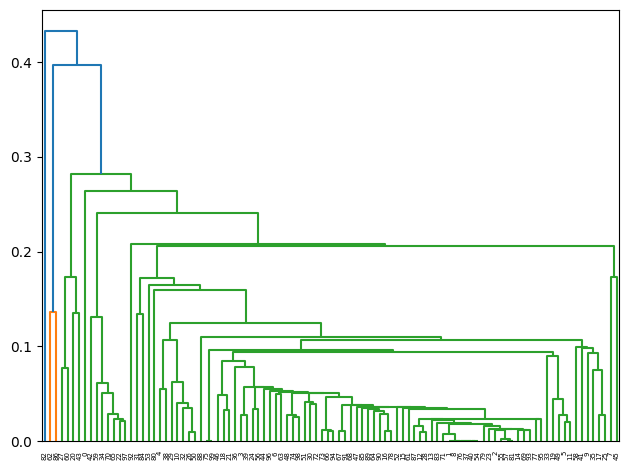

In [34]:
pca = PCA(n_components=4)
data_FE_pca = pca.fit_transform(data_FE)

linkage_data_pca = linkage(data_FE_pca, method='single', metric='euclidean')
dendrogram(linkage_data_pca)
plt.tight_layout()
plt.show()

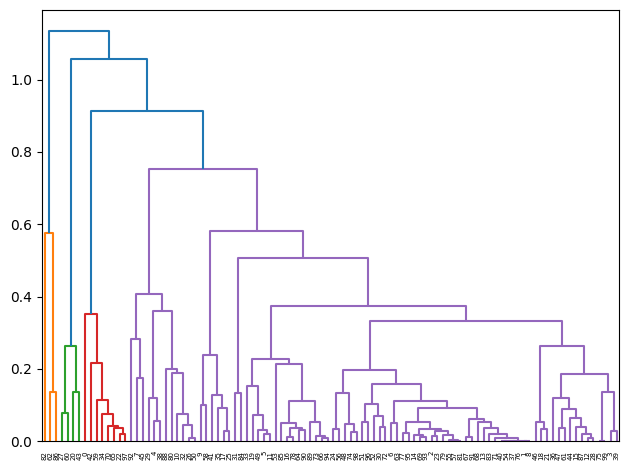

In [35]:
pca = PCA(n_components=4)
data_FE_pca = pca.fit_transform(data_FE)

linkage_data_pca = linkage(data_FE_pca, method='complete', metric='euclidean')
dendrogram(linkage_data_pca)
plt.tight_layout()
plt.show()

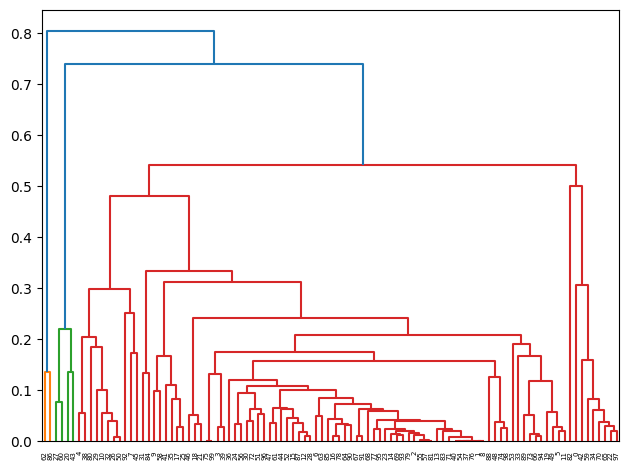

In [36]:
pca = PCA(n_components=4)
data_FE_pca = pca.fit_transform(data_FE)

linkage_data_pca = linkage(data_FE_pca, method='average', metric='euclidean')
dendrogram(linkage_data_pca)
plt.tight_layout()
plt.show()

In [37]:
df_Kmeans = df.copy(deep=True)
df_Kmeans['cluster'] = kn7.labels_
df_Kmeans

,Text,Sentiment,count_words,cluster
0,enjoying beautiful day park,Positive,4,1
1,traffic terrible morning,Negative,3,2
2,finished amazing workout,Positive,3,2
3,excited upcoming weekend getaway,Positive,4,5
4,trying new recipe dinner tonight,Neutral,5,0
...,...,...,...,...
95,confusion reigns try make sense recent events,Confusion,7,2
96,excitement building surprise birthday party,Excitement,5,0
97,witnessed act kindness made day,Kind,5,1
98,pride completing challenging fitness challenge,Pride,5,3


Kmeans for cluster 0


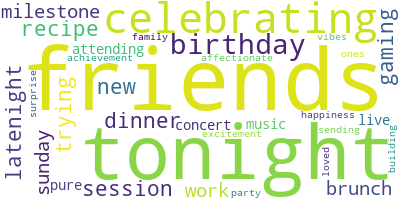

In [22]:
c=0

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Kmeans for cluster 1


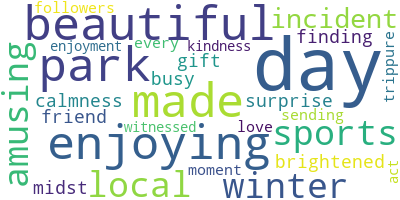

In [23]:
c=1

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Kmeans for cluster 2


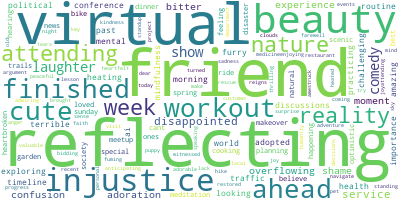

In [24]:
c=2

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Kmeans for cluster 3


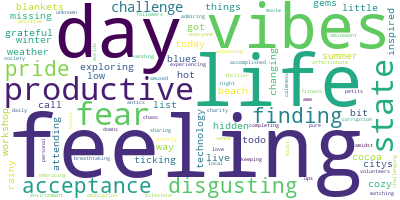

In [25]:
c=3

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Kmeans for cluster 4


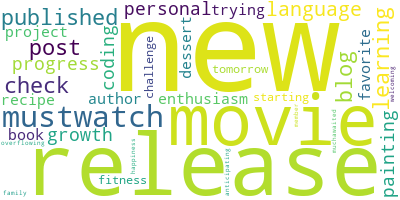

In [26]:
c=4

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Kmeans for cluster 5


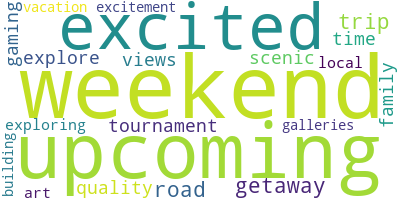

In [170]:
c=5

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Kmeans for cluster 6


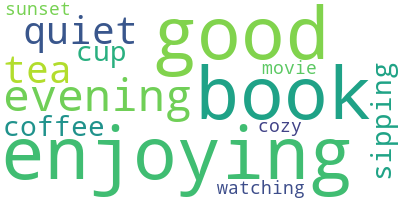

In [164]:
c=6

print('Kmeans for cluster '+str(c))
df_c = df_Kmeans[df_Kmeans['cluster'] == c]
# Join the different processed titles together.
long_string = ','.join(list(df_c['Text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()